# Clothes classification with Keras and Tensorflow

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test)=fashion_mnist.load_data()

In [3]:
print(X_train_full.shape, X_train_full.dtype)

(60000, 28, 28) uint8


# Create a validation dataset

we need to create a validation set and we must scale the dataset to use the gradient descent 

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

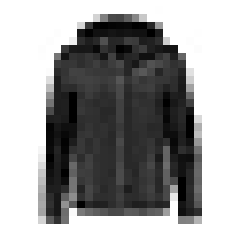

In [5]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

We need to a list of class

In [6]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names=['T-shirt/top','Trouser','Pullover', 'Dress',
            'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']

In [8]:
class_names[0]

'T-shirt/top'

In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

### 1)create a sequential model, simple model just composed of layers connected sequentially. This is called the Sequential API
### 2)We build the first layer and add it to the model, this is a flattent layer whose role is to convert each imput in a 1D array. No parametters, just do simple preprocessing. Because it is the first layer in the model we have to specifify the input_shape.
### 3)Next dense hidden layer with 300 neurons with relu function. Each dense layer manages its own weight matrix, contianing all the connection weighs between the neurons and their inputs and biais
    



In [10]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

The model summary() method displays all the model's layers, output shape, number of parameters 

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### comment:
dense layers often have a lot of parameters, the first layer has 784*300 connection weights, plus 300 bias whicha dd up 235500==> give a lot of flexibility to fit the training data but also haave a risk of overfitting specifically wehn just a little bit of data 

We can easily get a model's list of layers, to fetch a layer by its index, or you can fetch by nale:

In [12]:
model.layers

In [13]:
hidden1=model.layers[1]
hidden1.name

'dense_3'

In [14]:
#model.get_layer('dense_3') is hidden1

All the parameters of a layer can be accessed using its get_weights() and set_weights

In [15]:
weights, biaises = hidden1.get_weights()
weights

array([[-0.02575141, -0.01187175, -0.07407567, ...,  0.07387409,
         0.04479794, -0.06903711],
       [ 0.00553425, -0.02421331,  0.06156331, ..., -0.05268547,
         0.00243491, -0.04997355],
       [-0.0367851 ,  0.0153354 , -0.0719085 , ..., -0.02543882,
        -0.07039508,  0.03772683],
       ...,
       [ 0.04962219,  0.03908786, -0.01873257, ..., -0.00820528,
        -0.06651986,  0.01632631],
       [ 0.00534961, -0.00309027, -0.00480562, ..., -0.0029925 ,
        -0.06931439, -0.03359172],
       [ 0.02773411,  0.02060208, -0.05566793, ..., -0.05858169,
         0.07322757,  0.04227317]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biaises

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biaises.shape

(300,)

# Compiling the model

after a model is created, you must call its compile() method to specify the loss fucntion and the optimizer
to use. 
 <p> Optionnaly we can specifify a list of extra metriucs to compute during training and evaluation:

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd',
             metrics=['accuracy'])

### Comment
we us sparse_categorical_crossentropy because we have sparse label there is just a target class index, from 0 to 0 in this case) and the classes are exclusive

regarding the otpimizer 'sgd' means we will use Stochastic gradient descent, keras will perform the backpropagation

# Training and evaluating the model 

In [20]:
history=model.fit(X_train, y_train, epochs=30,
                 validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7071 - accuracy: 0.7667 - val_loss: 0.5416 - val_accuracy: 0.8126
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4877 - accuracy: 0.8287 - val_loss: 0.4437 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4426 - accuracy: 0.8441 - val_loss: 0.4517 - val_accuracy: 0.8416
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4160 - accuracy: 0.8538 - val_loss: 0.4010 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3963 - accuracy: 0.8595 - val_loss: 0.3861 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3792 - accuracy: 0.8662 - val_loss: 0.3848 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3668 - accuracy: 0.8704 - val_loss: 0.3749 - val_accuracy:

we pass the input features (X_train) and the target classes(y_train, as well as the number of epochs to train,
<p>We also pass a validation set</p>                                                    

Keras will measure the loss and the extra metrics  on this set at the end of a ecach epoch  which is very useful to understand the performance of the model.
if the eprformance on the training set is much better than on the validation set, your model really performs. If the performance set is much better than a validation set, your model is overfitting(or data msimatch bewteen the training and validationset)

In [21]:
import pandas as pd

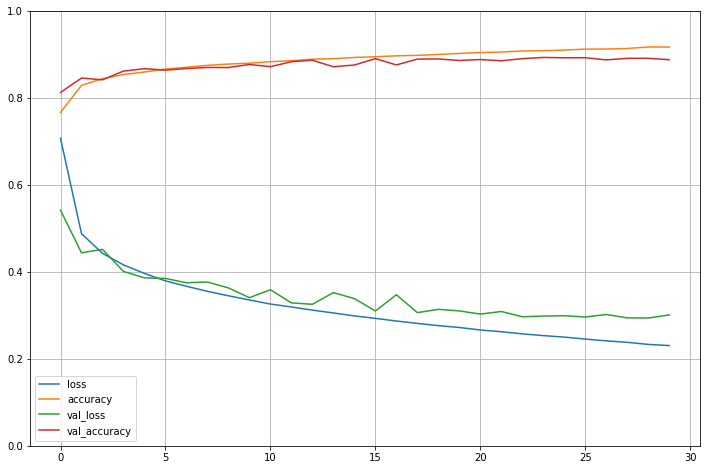

In [22]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

training and validation accuracy steadiliy increase during training while the training loss and valiadation loss decrease.
<p>validation curves are close to the training curves==> there is not too much overfitting</p>



if not satisfied by the performance we can go back and tune the hyperametters:
    -first to check the learning rate if not try another optimiser
    -if not number of layer, neurone per layer, type of activation 
    -batch size 

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8834


[0.33108893036842346, 0.883400022983551]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred=model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [29]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

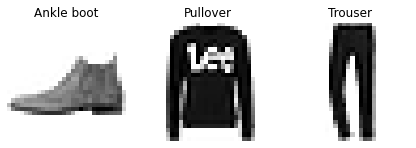

In [32]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()